In [1]:
!pip install PyWavelets

In [2]:
!pip install opencv-python

In [3]:
!pip install seaborn

In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread("./test_dataset/1.jpg")
img.shape

(1000, 1600, 3)

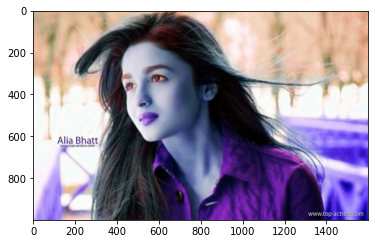

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1000, 1600)

In [8]:
gray

array([[173, 173, 173, ..., 176, 177, 177],
       [173, 173, 173, ..., 175, 176, 176],
       [172, 173, 173, ..., 174, 175, 175],
       ...,
       [221, 220, 218, ...,  74,  78,  81],
       [220, 219, 218, ...,  74,  78,  81],
       [220, 219, 217, ...,  74,  78,  81]], dtype=uint8)

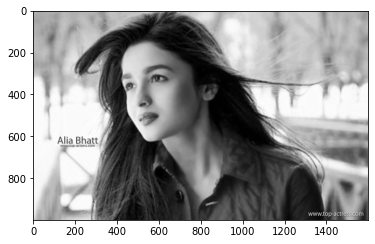

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[319, 181, 430, 430]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(319, 181, 430, 430)

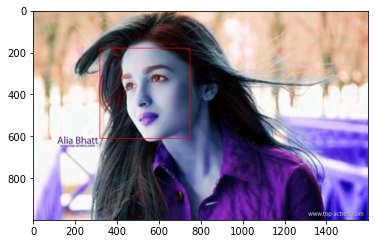

In [12]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

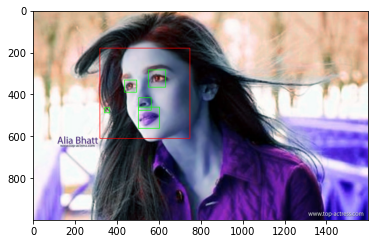

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

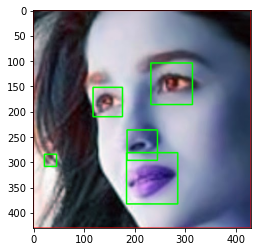

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
#function for finding the face only cropped image of any celebrity
def get_cropped_image_if_2_eye(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

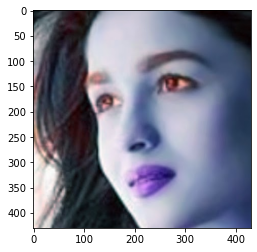

In [16]:
cropped_img = get_cropped_image_if_2_eye("./test_dataset/1.jpg")
plt.imshow(cropped_img)

In [20]:
path_to_data = "./dataset/dataset/"
path_to_data1 = "./dataset/dataset1/"
path_to_data2 = "./dataset/dataset2/"
path_to_data3 = "./dataset/dataset3/"
path_to_cr_data = "./dataset/cropped/"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./dataset/dataset/Akshay_Kumar',
 './dataset/dataset/Alia_Bhatt',
 './dataset/dataset/Amitabh_Bachchan',
 './dataset/dataset/Anil_Kapoor',
 './dataset/dataset/Deepika_Padukone']

In [23]:
# #Path to all the folders present in the dataset folder
# import os
# img_dirs1 = []
# for entry in os.scandir(path_to_data1):
#     if entry.is_dir():
#         img_dirs1.append(entry.path)

In [24]:
# img_dirs1

In [25]:
import shutil
#create cropped folder in dataset folder
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
cropped_image_dirs = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_name_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eye(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
#             print(cropped_folder)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_name)
            count += 1

Akshay_Kumar
./dataset/dataset/Akshay_Kumar\1.png
./dataset/dataset/Akshay_Kumar\10.jpg
./dataset/dataset/Akshay_Kumar\100.jpg
Generating folder:  ./dataset/cropped/Akshay_Kumar
./dataset/dataset/Akshay_Kumar\101.jpg
./dataset/dataset/Akshay_Kumar\102.jpg
./dataset/dataset/Akshay_Kumar\103.jpg
./dataset/dataset/Akshay_Kumar\104.jpg
./dataset/dataset/Akshay_Kumar\105.jpg
./dataset/dataset/Akshay_Kumar\106.jpg
./dataset/dataset/Akshay_Kumar\107.jpg
./dataset/dataset/Akshay_Kumar\108.jpg
./dataset/dataset/Akshay_Kumar\109.jpg
./dataset/dataset/Akshay_Kumar\11.jpg
./dataset/dataset/Akshay_Kumar\110.jpg
./dataset/dataset/Akshay_Kumar\111.jpg
./dataset/dataset/Akshay_Kumar\112.jpg
./dataset/dataset/Akshay_Kumar\113.jpg
./dataset/dataset/Akshay_Kumar\114.jpg
./dataset/dataset/Akshay_Kumar\115.jpg
./dataset/dataset/Akshay_Kumar\116.jpg
./dataset/dataset/Akshay_Kumar\117.png
./dataset/dataset/Akshay_Kumar\118.jpg
./dataset/dataset/Akshay_Kumar\119.jpg
./dataset/dataset/Akshay_Kumar\12.jpg
./dat

./dataset/dataset/Alia_Bhatt\3.jpg
./dataset/dataset/Alia_Bhatt\30.jpg
./dataset/dataset/Alia_Bhatt\31.jpg
./dataset/dataset/Alia_Bhatt\32.jpg
./dataset/dataset/Alia_Bhatt\33.jpg
./dataset/dataset/Alia_Bhatt\34.jpg
./dataset/dataset/Alia_Bhatt\35.jpg
./dataset/dataset/Alia_Bhatt\36.jpg
./dataset/dataset/Alia_Bhatt\37.jpg
./dataset/dataset/Alia_Bhatt\38.jpg
./dataset/dataset/Alia_Bhatt\39.jpg
./dataset/dataset/Alia_Bhatt\4.jpg
./dataset/dataset/Alia_Bhatt\40.jpg
./dataset/dataset/Alia_Bhatt\41.jpg
./dataset/dataset/Alia_Bhatt\42.jpg
./dataset/dataset/Alia_Bhatt\43.jpg
./dataset/dataset/Alia_Bhatt\44.jpg
./dataset/dataset/Alia_Bhatt\45.jpg
./dataset/dataset/Alia_Bhatt\46.jpg
./dataset/dataset/Alia_Bhatt\47.jpg
./dataset/dataset/Alia_Bhatt\48.jpg
./dataset/dataset/Alia_Bhatt\49.jpg
./dataset/dataset/Alia_Bhatt\5.jpg
./dataset/dataset/Alia_Bhatt\50.jpg
./dataset/dataset/Alia_Bhatt\51.jpg
./dataset/dataset/Alia_Bhatt\52.jpg
./dataset/dataset/Alia_Bhatt\53.jpg
./dataset/dataset/Alia_Bhatt\54

./dataset/dataset/Amitabh_Bachchan\92.jpg
./dataset/dataset/Amitabh_Bachchan\93.jpg
./dataset/dataset/Amitabh_Bachchan\94.jpg
./dataset/dataset/Amitabh_Bachchan\95.jpg
./dataset/dataset/Amitabh_Bachchan\96.jpg
./dataset/dataset/Amitabh_Bachchan\97.jpg
./dataset/dataset/Amitabh_Bachchan\98.jpg
./dataset/dataset/Amitabh_Bachchan\99.jpg
Anil_Kapoor
./dataset/dataset/Anil_Kapoor\1.jpg
Generating folder:  ./dataset/cropped/Anil_Kapoor
./dataset/dataset/Anil_Kapoor\10.jpg
./dataset/dataset/Anil_Kapoor\100.jpg
./dataset/dataset/Anil_Kapoor\101.jpg
./dataset/dataset/Anil_Kapoor\102.jpg
./dataset/dataset/Anil_Kapoor\103.jpg
./dataset/dataset/Anil_Kapoor\104.jpg
./dataset/dataset/Anil_Kapoor\105.jpg
./dataset/dataset/Anil_Kapoor\106.jpeg
./dataset/dataset/Anil_Kapoor\107.jpg
./dataset/dataset/Anil_Kapoor\108.jpg
./dataset/dataset/Anil_Kapoor\109.jpg
./dataset/dataset/Anil_Kapoor\11.jpg
./dataset/dataset/Anil_Kapoor\12.jpg
./dataset/dataset/Anil_Kapoor\13.jpeg
./dataset/dataset/Anil_Kapoor\14.jpe

./dataset/dataset/Deepika_Padukone\18.jpg
./dataset/dataset/Deepika_Padukone\180.jpg
./dataset/dataset/Deepika_Padukone\181.jpg
./dataset/dataset/Deepika_Padukone\182.jpg
./dataset/dataset/Deepika_Padukone\183.jpg
./dataset/dataset/Deepika_Padukone\184.jpg
./dataset/dataset/Deepika_Padukone\185.jpg
./dataset/dataset/Deepika_Padukone\186.jpg
./dataset/dataset/Deepika_Padukone\187.jpg
./dataset/dataset/Deepika_Padukone\188.jpg
./dataset/dataset/Deepika_Padukone\189.jpg
./dataset/dataset/Deepika_Padukone\19.jpg
./dataset/dataset/Deepika_Padukone\190.jpg
./dataset/dataset/Deepika_Padukone\191.jpg
./dataset/dataset/Deepika_Padukone\192.jpg
./dataset/dataset/Deepika_Padukone\193.jpg
./dataset/dataset/Deepika_Padukone\194.jpg
./dataset/dataset/Deepika_Padukone\195.jpg
./dataset/dataset/Deepika_Padukone\197.jpg
./dataset/dataset/Deepika_Padukone\198.jpg
./dataset/dataset/Deepika_Padukone\2.jpg
./dataset/dataset/Deepika_Padukone\20.jpg
./dataset/dataset/Deepika_Padukone\21.jpg
./dataset/dataset

In [27]:
# cropped_image_dirs = []
# celebrity_file_name_dict = {}

# for img_dir in img_dirs1:
#     count = 1
#     celebrity_name = img_dir.split('/')[-1]
#     print(celebrity_name)
#     celebrity_file_name_dict[celebrity_name] = []
#     for entry in os.scandir(img_dir):
#         print(entry.path)
#         roi_color = get_cropped_image_if_2_eye(entry.path)
        
#         if roi_color is not None:
#             cropped_folder = path_to_cr_data + celebrity_name
# #             print(cropped_folder)
#             if not os.path.exists(cropped_folder):
#                 os.makedirs(cropped_folder)
#                 cropped_image_dirs.append(cropped_folder)
#                 print("Generating folder: ", cropped_folder)
                
#             cropped_file_name = celebrity_name + str(count) + ".jpg"
#             cropped_file_path = cropped_folder + "/" + cropped_file_name
            
#             cv2.imwrite(cropped_file_path, roi_color)
#             celebrity_file_name_dict[celebrity_name].append(cropped_file_name)
#             count += 1

In [28]:
# img_dirs2 = []
# for entry in os.scandir(path_to_data2):
#     if entry.is_dir():
#         img_dirs2.append(entry.path)

In [29]:
# img_dirs2

In [30]:
# for img_dir in img_dirs2:
#     count = 1
#     celebrity_name = img_dir.split('/')[-1]
#     print(celebrity_name)
#     celebrity_file_name_dict[celebrity_name] = []
#     for entry in os.scandir(img_dir):
#         print(entry.path)
#         roi_color = get_cropped_image_if_2_eye(entry.path)
        
#         if roi_color is not None:
#             cropped_folder = path_to_cr_data + celebrity_name
# #             print(cropped_folder)
#             if not os.path.exists(cropped_folder):
#                 os.makedirs(cropped_folder)
#                 cropped_image_dirs.append(cropped_folder)
#                 print("Generating folder: ", cropped_folder)
                
#             cropped_file_name = celebrity_name + str(count) + ".jpg"
#             cropped_file_path = cropped_folder + "/" + cropped_file_name
            
#             cv2.imwrite(cropped_file_path, roi_color)
#             celebrity_file_name_dict[celebrity_name].append(cropped_file_name)
#             count += 1

In [31]:
# img_dirs3 = []
# for entry in os.scandir(path_to_data3):
#     if entry.is_dir():
#         img_dirs3.append(entry.path)

In [32]:
# img_dirs3

In [33]:
# for img_dir in img_dirs3:
#     count = 1
#     celebrity_name = img_dir.split('/')[-1]
#     print(celebrity_name)
#     celebrity_file_name_dict[celebrity_name] = []
#     for entry in os.scandir(img_dir):
#         print(entry.path)
#         roi_color = get_cropped_image_if_2_eye(entry.path)
        
#         if roi_color is not None:
#             cropped_folder = path_to_cr_data + celebrity_name
# #             print(cropped_folder)
#             if not os.path.exists(cropped_folder):
#                 os.makedirs(cropped_folder)
#                 cropped_image_dirs.append(cropped_folder)
#                 print("Generating folder: ", cropped_folder)
                
#             cropped_file_name = celebrity_name + str(count) + ".jpg"
#             cropped_file_path = cropped_folder + "/" + cropped_file_name
            
#             cv2.imwrite(cropped_file_path, roi_color)
#             celebrity_file_name_dict[celebrity_name].append(cropped_file_name)
#             count += 1

In [34]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeff_H = list(coeffs)
    coeff_H[0] *= 0
    
    imArray_H = pywt.waverec2(coeff_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

In [35]:
celebrity_file_name_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_name_dict[celebrity_name] = file_list
celebrity_file_name_dict

{'Akshay_Kumar': ['./dataset/cropped/Akshay_Kumar\\Akshay_Kumar1.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar10.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar11.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar12.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar13.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar14.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar15.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar16.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar17.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar18.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar19.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar2.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar20.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar21.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar22.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar23.jpg',
  './dataset/cropped/Akshay_Kumar\\Akshay_Kumar24.jpg',
  './dataset/cropped/Akshay_Kumar\

In [36]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'Akshay_Kumar': 0,
 'Alia_Bhatt': 1,
 'Amitabh_Bachchan': 2,
 'Anil_Kapoor': 3,
 'Deepika_Padukone': 4}

In [37]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [38]:
X = np.array(X).reshape(len(X), 4096).astype(float)

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7666666666666667

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.71      0.91      0.80        35
           2       0.79      0.65      0.71        17
           3       0.92      0.80      0.86        15
           4       0.81      0.72      0.76        36

    accuracy                           0.77       120
   macro avg       0.78      0.75      0.76       120
weighted avg       0.78      0.77      0.76       120



In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.844444,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.533333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.830556,{'logisticregression__C': 1}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test)

0.7666666666666667

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.6

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7916666666666666

In [49]:
best_clf = best_estimators['svm']

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  2,  1,  1,  1],
       [ 0, 29,  0,  0,  6],
       [ 3,  0, 13,  0,  1],
       [ 0,  1,  1, 13,  0],
       [ 1,  9,  0,  1, 25]], dtype=int64)

Text(69.0, 0.5, 'Truth')

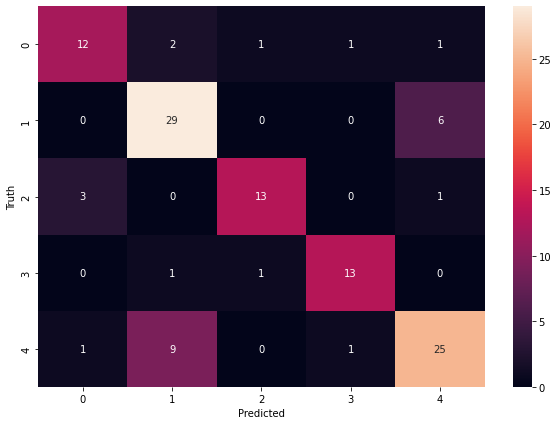

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
class_dict

{'Akshay_Kumar': 0,
 'Alia_Bhatt': 1,
 'Amitabh_Bachchan': 2,
 'Anil_Kapoor': 3,
 'Deepika_Padukone': 4}

In [53]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [54]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))